<a href="https://colab.research.google.com/github/m-agnet/Bachelor-of-Physics/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#データを横軸: 時間, 縦軸: 物理量で描画

In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# ファイルを読み込む
path = '/content/drive/MyDrive/Colab Notebooks/data_analysis/.txt'
data = pd.read_table(path, sep='\s+')
quantity_name = 'TotEng'

# 設定の入力
thermo = 100
t_step = 0.005


# データを出力する
print(data)


          Step    Time      Temp    TotEng     Press
0            0     0.0  1.000000  0.401105 -0.329799
1          100     0.5  1.381263  0.338556  0.291367
2          200     1.0  1.347597  0.198765  0.215974
3          300     1.5  1.279826  0.037041  0.214856
4          400     2.0  1.197260 -0.116242  0.196625
...        ...     ...       ...       ...       ...
9996    999600  4998.0  0.992372 -1.367131  0.042690
9997    999700  4998.5  0.997397 -1.355571  0.063114
9998    999800  4999.0  1.003290 -1.348665  0.039733
9999    999900  4999.5  1.000845 -1.341931  0.076120
10000  1000000  5000.0  0.990251 -1.333634  0.043692

[10001 rows x 5 columns]


In [3]:
# # データを短くしたいときには実行する
# sidx=1000 + 1
# eidx=10000 + 1
# data = data.drop(range(sidx,eidx))
# print(data)

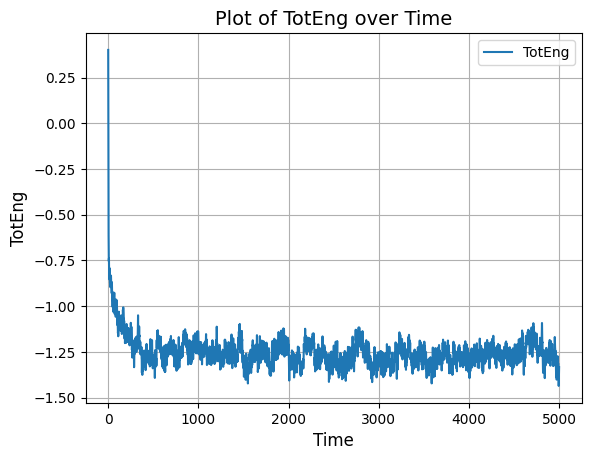

In [4]:
# データをプロットする
data.plot(x='Time', y=quantity_name)

plt.xlabel('Time', fontsize=12)
plt.ylabel(quantity_name, fontsize=12)
plt.title('Plot of ' + quantity_name + ' over Time', fontsize=14)
plt.grid()

plt.show()


## 初期値を捨てる

          Step    Time      Temp    TotEng     Press
10        1000     5.0  0.994437 -0.663621  0.091107
11        1100     5.5  0.978691 -0.706142  0.053089
12        1200     6.0  0.984578 -0.734880  0.058971
13        1300     6.5  0.988599 -0.750073  0.039689
14        1400     7.0  0.980737 -0.754022  0.024451
...        ...     ...       ...       ...       ...
9996    999600  4998.0  0.992372 -1.367131  0.042690
9997    999700  4998.5  0.997397 -1.355571  0.063114
9998    999800  4999.0  1.003290 -1.348665  0.039733
9999    999900  4999.5  1.000845 -1.341931  0.076120
10000  1000000  5000.0  0.990251 -1.333634  0.043692

[9991 rows x 5 columns]


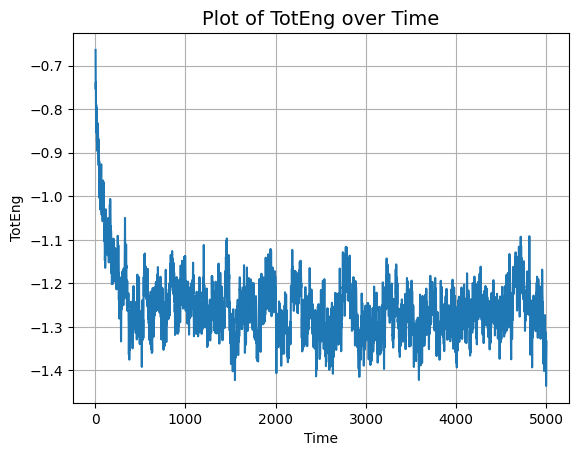

In [5]:
# データ加工
start = 0
end = 9
data = data.drop(range(start,end+1))
print(data)

# データを再格納する
x = data['Time']  # 時間
y = data[quantity_name]  # 物理量

# データをプロットする
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel(quantity_name)
plt.title('Plot of ' + quantity_name + ' over Time', fontsize=14)
plt.grid()

plt.show()


# 緩和時間(thermo>=10000では実行しない)

## log変換(推定平均値使用)

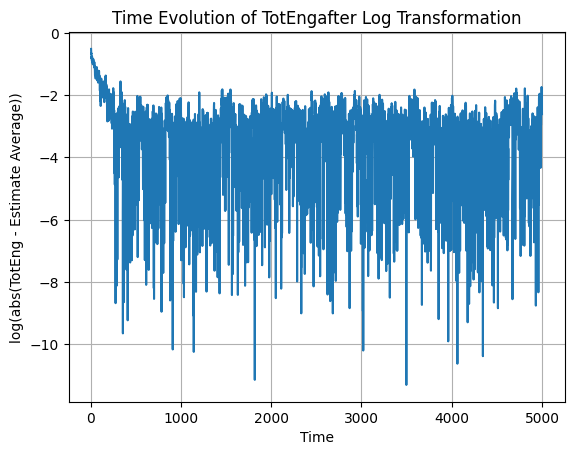

In [6]:
# log変換
estimate_average = -1.26 # 推定平均値を入力
y_log = np.log(np.abs(y - estimate_average))
plt.plot(x, y_log)
plt.xlabel('Time')
plt.ylabel('log(abs(' + quantity_name + ' - Estimate Average))')
plt.title('Time Evolution of ' + quantity_name + 'after Log Transformation')
plt.grid()
plt.show()


## 線形近似によって緩和時間の測定

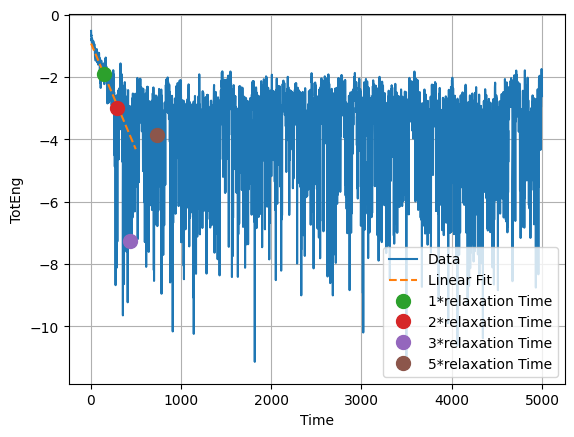

1倍緩和時間 = 146.00656626960537
2倍緩和時間 = 292.01313253921074
3倍緩和時間 = 438.0196988088161
5倍緩和時間 = 730.0328313480269


In [7]:
if thermo < 10000:

    # 指定のx軸の範囲にあるデータだけを使ってフィットする
    xmin = 5  # 最小のx軸の値
    xmax = 500  # 最大のx軸の値
    mask = (x >= xmin) & (x <= xmax)
    p = np.polyfit(x[mask], y_log[mask], 1)
    y_fit = np.polyval(p, x[mask])

    # フィット直線の傾きから緩和時間を計算する
    tau = -1/p[0]
    times = [1, 2, 3, 5]
    y_vals = [np.interp(tau * t, x, y_log) for t in times]

    # プロット
    fig, ax = plt.subplots()
    ax.plot(x, y_log, label='Data')
    ax.plot(x[mask], y_fit, '--', label='Linear Fit')
    for t, y in zip(times, y_vals):
        ax.plot(tau*t, y, 'o', markersize=10, label=f'{t}*relaxation Time')
    ax.set_xlabel('Time')
    ax.set_ylabel(quantity_name)
    ax.legend()
    plt.grid()
    plt.show()

    # 結果の出力
    for t, y in zip(times, y_vals):
        print(f'{t}倍緩和時間 =', t*tau)


## 5倍緩和時間以前を捨てる データ加工

          Step    Time      Temp    TotEng     Press
1461    146100   730.5  0.988944 -1.308104  0.097297
1462    146200   731.0  0.990967 -1.322346  0.062266
1463    146300   731.5  0.996282 -1.328381  0.023997
1464    146400   732.0  0.986828 -1.328360  0.067101
1465    146500   732.5  0.996993 -1.320309  0.070427
...        ...     ...       ...       ...       ...
9996    999600  4998.0  0.992372 -1.367131  0.042690
9997    999700  4998.5  0.997397 -1.355571  0.063114
9998    999800  4999.0  1.003290 -1.348665  0.039733
9999    999900  4999.5  1.000845 -1.341931  0.076120
10000  1000000  5000.0  0.990251 -1.333634  0.043692

[8540 rows x 5 columns]


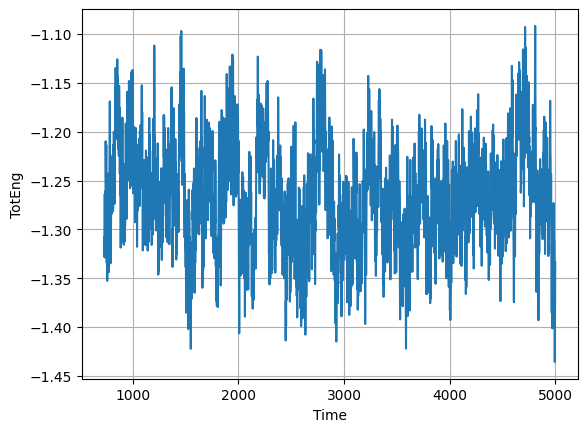

In [8]:
if thermo < 10000:

    # 再度ファイルを読み込む
    data = pd.read_table(path, sep='\s+')

    # 設定の入力
    skip = t_step * thermo # 1行ごとにskipだけtimeを進めるデータを使っている

    # データ加工
    t=5 # t倍の緩和時間を使用
    trimm = t*tau // skip # 切り捨てるデータの最終行を決定

    start = 0
    end = int(trimm)
    data = data.drop(range(start,end+1))

    # データの出力
    print(data)

    # データを再格納する
    x = data['Time']  # 時間
    y = data[quantity_name]  # 物理量

    # データをプロットする
    plt.plot(x, y)
    plt.xlabel('Time')
    plt.ylabel(quantity_name)
    plt.grid()
    plt.show()


# 物理量の確率密度分布

Mean: -1.26613
Median: -1.26744
Standard deviation: 0.05308
Minimum value: -1.43574
Maximum value: -1.09174
Interquartile range: 0.07259


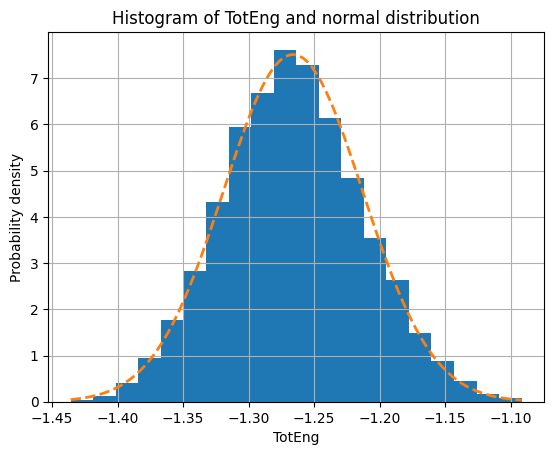

In [9]:
# データ生成
quantity = data[quantity_name] # t倍の緩和時間以前を捨てた物理量データ

# 統計情報の表示
print(f"Mean: {np.mean(quantity):.5f}")
print(f"Median: {np.median(quantity):.5f}")
print(f"Standard deviation: {np.std(quantity):.5f}")
print(f"Minimum value: {np.min(quantity):.5f}")
print(f"Maximum value: {np.max(quantity):.5f}")
q1, q3 = np.percentile(quantity, [25, 75])
print(f"Interquartile range: {q3 - q1:.5f}")

# ヒストグラムの作成
n, bins, patches = plt.hist(quantity, bins=20, density=True)

# 平均値と標準偏差を求める
mu, sigma = quantity.mean(), quantity.std()

# 正規分布の確率密度関数を作成
x = np.linspace(quantity.min(), quantity.max(), 100)
y = norm.pdf(x, mu, sigma)

# 正規分布の確率密度関数をプロット
plt.plot(x, y, '--', linewidth=2, label='Normal Distribution')


# 軸ラベルの設定
plt.xlabel(quantity_name)
plt.ylabel('Probability density')

# グラフのタイトルの設定
plt.title('Histogram of ' + quantity_name + ' and normal distribution')

# グリッド線の表示
plt.grid()

# グラフを表示
plt.show()


# 大数の法則, 中心極限定理の確認

## ある程度で区切り, それぞれの平均値を用いてヒストグラムを作成

In [10]:
# データの確認
print(data)

          Step    Time      Temp    TotEng     Press
1461    146100   730.5  0.988944 -1.308104  0.097297
1462    146200   731.0  0.990967 -1.322346  0.062266
1463    146300   731.5  0.996282 -1.328381  0.023997
1464    146400   732.0  0.986828 -1.328360  0.067101
1465    146500   732.5  0.996993 -1.320309  0.070427
...        ...     ...       ...       ...       ...
9996    999600  4998.0  0.992372 -1.367131  0.042690
9997    999700  4998.5  0.997397 -1.355571  0.063114
9998    999800  4999.0  1.003290 -1.348665  0.039733
9999    999900  4999.5  1.000845 -1.341931  0.076120
10000  1000000  5000.0  0.990251 -1.333634  0.043692

[8540 rows x 5 columns]


In [11]:
# データのシャッフル, thermoが10,000より大きいならばコメントアウト..
if thermo < 10000:
    data = data.sample(frac=1)
    print(data)

        Step    Time      Temp    TotEng     Press
5095  509500  2547.5  0.987415 -1.352720  0.036423
6443  644300  3221.5  1.010030 -1.205443  0.048651
6033  603300  3016.5  0.982014 -1.273271  0.025512
2872  287200  1436.0  1.005139 -1.235346  0.036306
6410  641000  3205.0  0.997666 -1.297340  0.031189
...      ...     ...       ...       ...       ...
7203  720300  3601.5  1.000066 -1.299674  0.030573
5579  557900  2789.5  0.993844 -1.210656  0.058855
2104  210400  1052.0  0.979795 -1.250594  0.047642
4698  469800  2349.0  0.981523 -1.335915  0.031575
3021  302100  1510.5  1.001915 -1.338321  0.047763

[8540 rows x 5 columns]


Statistics for split=1
Mean: -1.26613
Median: -1.26744
Standard deviation: 0.05308
Minimum value: -1.43574
Maximum value: -1.09174
Interquartile range: 0.07259

Statistics for split=4
Mean: -1.26613
Median: -1.26645
Standard deviation: 0.02659
Minimum value: -1.34955
Maximum value: -1.17278
Interquartile range: 0.03593

Statistics for split=16
Mean: -1.26610
Median: -1.26561
Standard deviation: 0.01298
Minimum value: -1.30687
Maximum value: -1.23085
Interquartile range: 0.01862

Statistics for split=64
Mean: -1.26608
Median: -1.26603
Standard deviation: 0.00638
Minimum value: -1.28078
Maximum value: -1.25224
Interquartile range: 0.00966



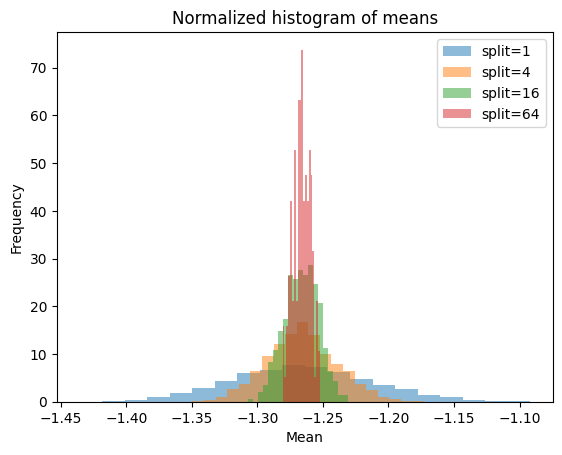

In [12]:
# データ整理
quantity = data[quantity_name]
num_rows = quantity.shape[0]

# 任意のsplit値のリスト
split_list = [1, 4, 16, 64]

for split in split_list:
    # ヒストグラムの描画
    num_splits = num_rows // split
    means = quantity.iloc[:num_splits*split].to_numpy().reshape(-1, split).mean(axis=1)
    plt.hist(means, bins=20, alpha=0.5, label=f"split={split}", density=True)

    # 統計情報
    mean = np.mean(means)
    median = np.median(means)
    std_dev = np.std(means, ddof=1)
    min_val = np.min(means)
    max_val = np.max(means)
    q1, q3 = np.percentile(means, [25, 75])

    print(f"Statistics for split={split}")
    print(f"Mean: {mean:.5f}")
    print(f"Median: {median:.5f}")
    print(f"Standard deviation: {std_dev:.5f}")
    print(f"Minimum value: {min_val:.5f}")
    print(f"Maximum value: {max_val:.5f}")
    print(f"Interquartile range: {q3-q1:.5f}")
    print()

# ヒストグラムの装飾
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Normalized histogram of means')
plt.legend()

plt.show()


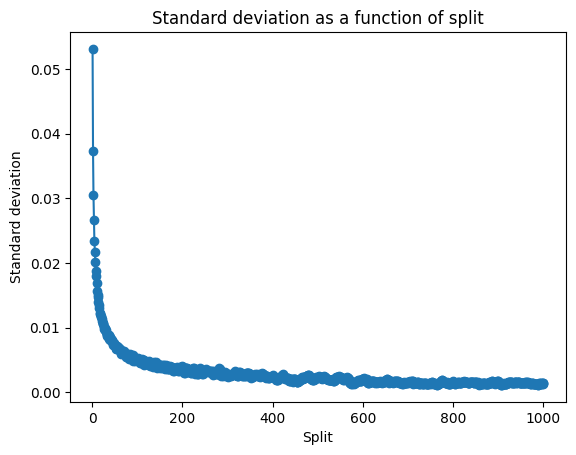

In [13]:
# splitによる標準偏差の推移
std_dev_list = []

start = 1
end = 1000

for split in range(start, end+1):
    # ヒストグラムの描画
    num_splits = num_rows // split
    means = quantity.iloc[:num_splits*split].to_numpy().reshape(-1, split).mean(axis=1)

    # 統計情報
    std_dev = np.std(means, ddof=1)
    std_dev_list.append(std_dev)

# 横軸にsplit、縦軸にstd_dev_listを取るプロットを作成
plt.plot(range(start, end+1), std_dev_list, 'o-')
plt.xlabel('Split')
plt.ylabel('Standard deviation')
plt.title('Standard deviation as a function of split')

plt.show()


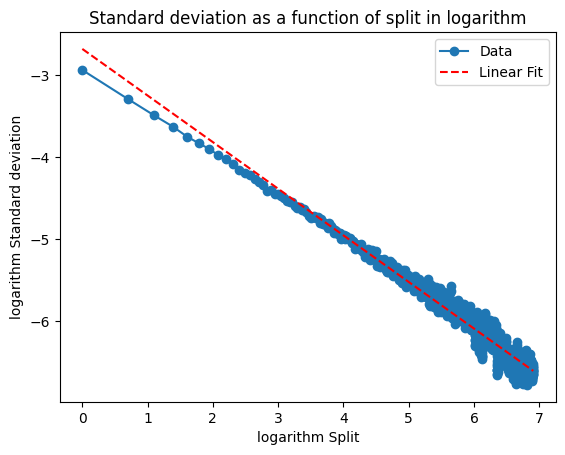

gradient=-0.5694451263669736


In [14]:
# 対数変換
x = np.log(range(start, end+1))
y = np.log(std_dev_list)
fit = np.polyfit(x, y, deg=1)  # 1次の多項式による線形フィット

# プロット
plt.plot(x, y, 'o-')
plt.plot(x, fit[0] * x + fit[1], color='red', linestyle='--')  # 線形フィットのプロット
plt.xlabel('logarithm Split')
plt.ylabel('logarithm Standard deviation')
plt.title('Standard deviation as a function of split in logarithm')
plt.legend(['Data', 'Linear Fit'])
plt.show()
print(f"gradient={fit[0]}")


In [15]:
# quantityの順番を元に戻す

if thermo < 10000:
    print(quantity)
    data=data.sort_index()
    quantity=data[quantity_name]
    print(quantity)

5095   -1.352720
6443   -1.205443
6033   -1.273271
2872   -1.235346
6410   -1.297340
          ...   
7203   -1.299674
5579   -1.210656
2104   -1.250594
4698   -1.335915
3021   -1.338321
Name: TotEng, Length: 8540, dtype: float64
1461    -1.308104
1462    -1.322346
1463    -1.328381
1464    -1.328360
1465    -1.320309
           ...   
9996    -1.367131
9997    -1.355571
9998    -1.348665
9999    -1.341931
10000   -1.333634
Name: TotEng, Length: 8540, dtype: float64


# 状態密度のプロット (TotEng以外では実行しない)

Mean: -1.27
Median: -1.27
Standard deviation: 0.05
Minimum value: -1.44
Maximum value: -1.09
Interquartile range: 0.07


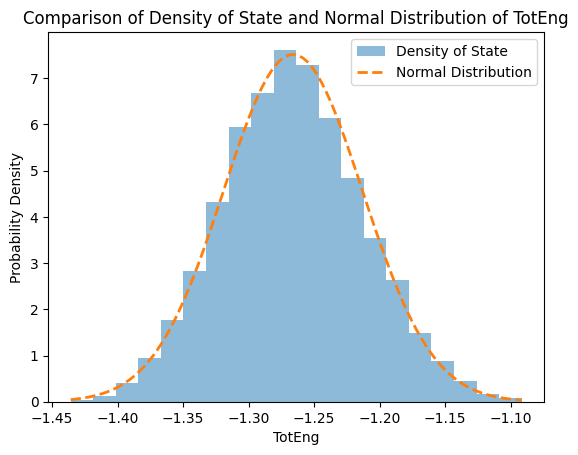

In [16]:
if quantity_name == 'TotEng':

    # ヒストグラムを作成
    plt.hist(quantity, bins=20, density=True, alpha=0.5, label='Density of State')

    # 統計情報の表示
    print(f"Mean: {np.mean(quantity):.2f}")
    print(f"Median: {np.median(quantity):.2f}")
    print(f"Standard deviation: {np.std(quantity):.2f}")
    print(f"Minimum value: {np.min(quantity):.2f}")
    print(f"Maximum value: {np.max(quantity):.2f}")
    q1, q3 = np.percentile(quantity, [25, 75])
    print(f"Interquartile range: {q3 - q1:.2f}")


    # 平均値と標準偏差を求める
    mu, sigma = quantity.mean(), quantity.std()

    # 正規分布の確率密度関数を作成
    x = np.linspace(quantity.min(), quantity.max(), 100)
    y = norm.pdf(x, mu, sigma)

    # 正規分布の確率密度関数をプロット
    plt.plot(x, y, '--', linewidth=2, label='Normal Distribution')

    # グラフを整形
    plt.xlabel(quantity_name)
    plt.ylabel('Probability Density')
    plt.title('Comparison of Density of State and Normal Distribution of ' + quantity_name)
    plt.legend()

    # グラフを表示
    plt.show()


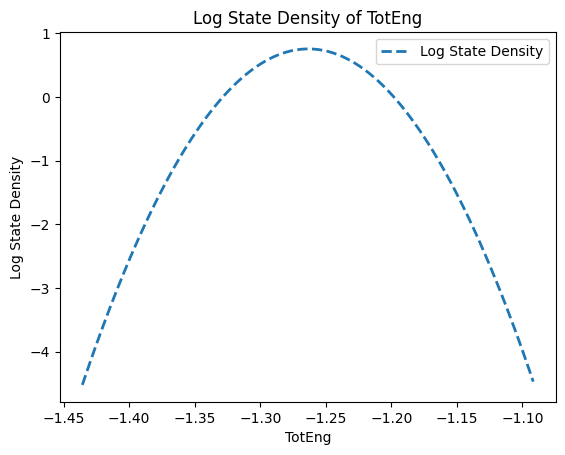

In [17]:
if quantity_name == 'TotEng':
    # 確率密度関数を対数に写す
    log_y = np.log(y)

    # 設定の入力
    beta = 1

    # 関数
    log_dos = log_y + beta * x

    # 正規分布の確率密度関数をプロット
    plt.plot(x, log_dos, '--', linewidth=2, label='Log State Density')

    # グラフを整形
    plt.xlabel(quantity_name)
    plt.ylabel('Log State Density')
    plt.title('Log State Density of ' + quantity_name)
    plt.legend()

    # グラフを表示
    plt.show()
